https://www.kaggle.com/madhab/jobposts

In [1]:
%cd ..

/home/elena/Documents/Project_jobs


In [2]:
import zipfile
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
zf = zipfile.ZipFile('data/online-job-postings.zip') 
df = pd.read_csv(zf.open('data job posts.csv'), encoding='latin')
print(df.shape)
df.head()

(19001, 24)


,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
df.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

In [5]:
df.Title.str.lower().value_counts().head()

accountant                  328
chief accountant            219
medical representative      218
sales manager               168
administrative assistant    156
Name: Title, dtype: int64

In [6]:
df.Title.isna().sum() #28
df.dropna(subset=['Title'], inplace=True)

In [7]:
df_accountant = df[df['Title'].str.contains('accountant', flags=re.IGNORECASE)]
print(df_accountant.shape)
df_accountant['Title'].unique()[:5]

(787, 24)


array(['Chief Accountant/ Finance Assistant', 'Chief Accountant',
       'Accountant', 'Accountant/ Financial Officer',
       'Finance Assistant/ Accountant'], dtype=object)

In [8]:
df_accountant_grouped = df_accountant.groupby(['Year', 'Month'])['Title'].count()

# fig = plt.figure(figsize=(30,7))
# ax = plt.subplot()
# # ax.tick_params(labelsize=10)
# # plt.xticks(rotation=45)
# import matplotlib.ticker as plticker
# loc = plticker.MultipleLocator(base=3.0)
# ax.xaxis.set_major_locator(loc)
# # plt.xticks(rotation=45)
# # ax.set_xticklabels(rotation=45)
# # for tick in ax.get_xticklabels():
# #     tick.set_rotation(45)
# df_accountant_grouped.plot()
# plt.xticks(rotation=45)
# plt.show()

In [9]:
def plot_vac(data, name):
    fig = plt.figure(figsize=(30,7))
    ax = plt.subplot()
    
    import matplotlib.ticker as plticker
    loc = plticker.MultipleLocator(base=5.0)
    ax.xaxis.set_major_locator(loc)
    line = data.plot(ax=ax, color='green', marker='o')
#     plt.legend(str(data.shape[0])+'of'+str(df.shape[0]))
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(name, fontsize=25)
    plt.ylabel('Number of vacancies', fontsize=20)
    plt.xlabel('Year, month', fontsize=20)
    plt.grid()
    return (plt.savefig("results/" + name + ".png", bbox_inches='tight'), plt.show())

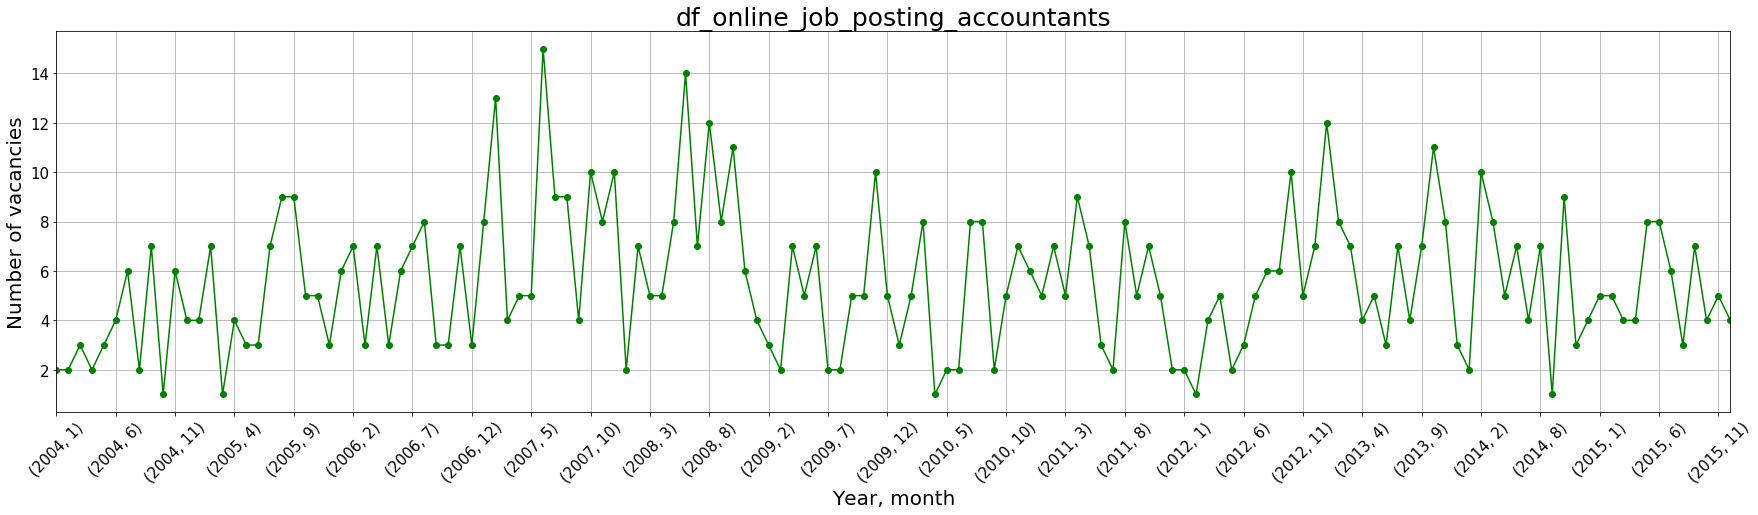

(None, None)

In [10]:
plot_vac(df_accountant_grouped, 'df_online_job_posting_accountants')

In [11]:
df_medical = df[df['Title'].str.contains('medical', flags=re.IGNORECASE)]
print(df_medical.shape)
# df_medical.Title.unique()[:5]
# df_medical.head()

(334, 24)


In [12]:
# df_medical_grouped = df_medical.groupby(['Year', 'Month'])['Title'].count()
# df_medical_grouped.head(7)

(927, 24)


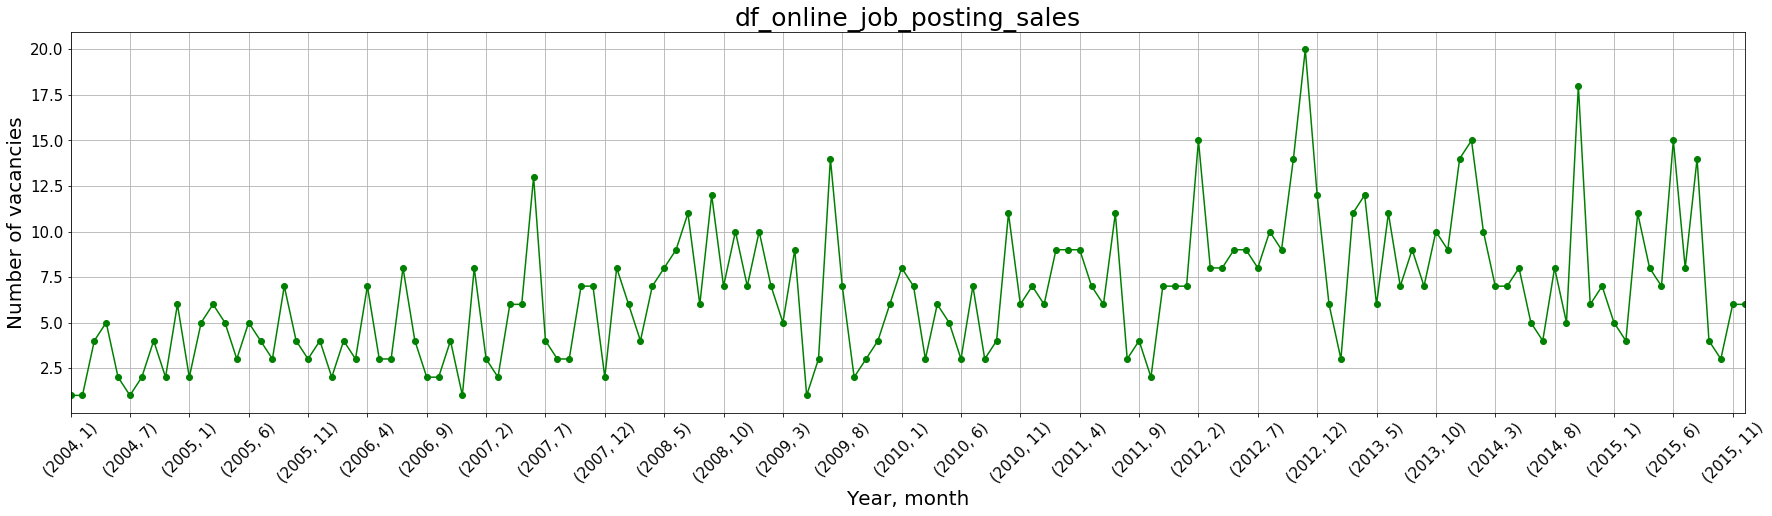

(None, None)

In [13]:
df_sales = df[df['Title'].str.contains('sales', flags=re.IGNORECASE)]
print(df_sales.shape)
df_sales.Title.unique()[:5]
# df_sales.head()
df_sales_grouped = df_sales.groupby(['Year', 'Month'])['Title'].count()
plot_vac(df_sales_grouped, 'df_online_job_posting_sales')

(252, 24)


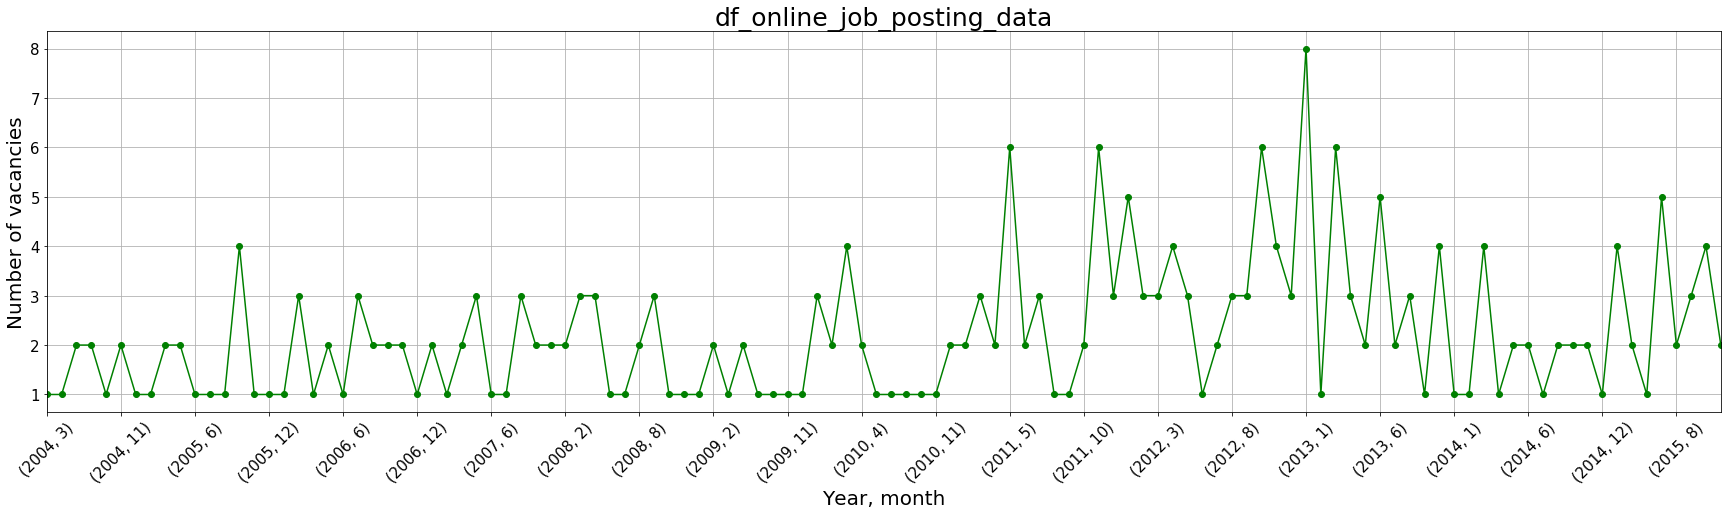

(None, None)

In [14]:
df_data = df[df['Title'].str.contains('data', flags=re.IGNORECASE)]
print(df_data.shape)
df_data.Title.unique()[:5]
# df_data.head()
df_data_grouped = df_data.groupby(['Year', 'Month'])['Title'].count()
plot_vac(df_data_grouped, 'df_online_job_posting_data')

In [15]:
df_blockchain = df[df['Title'].str.contains('blockchain', flags=re.IGNORECASE)]
print(df_blockchain.shape)
df_blockchain.Title.unique()[:5]
# df_dblockchain.head()
df_blockchain_grouped = df_blockchain.groupby(['Year', 'Month'])['Title'].count()
# plot_vac(df_blockchain_grouped, 'df_online_job_posting blockchain')

(0, 24)


In [16]:
df_data[df_data['Year'] > 2013]['Title'].unique()

array(['Information Data Specialist', 'Database and Report Manager',
       'Database Developer (MS SQL)', 'Data Management Specialist',
       'Business Intelligence Database Administrator',
       'Database Development Team Leader/ Fraud and Revenue Assurance',
       'Data and Business Intelligence Specialist',
       'Data Quality Developer', 'Database Developer',
       'Senior Database Engineer', 'Database Programmer',
       'Database Administrator',
       'IT Reporting Engineer (Database Developer)',
       'Oracle Database Administrator',
       'Local Consultant for Private Sector Mapping and Database Setup in',
       'Junior Database Specialist', 'Roaming and Database Administrator',
       'Data Entry Specialist', 'Data Warehouse Specialist',
       'Data Manager', 'SQL Data Analyst',
       'Program Manager for Data Initiative (PMDI)',
       'Junior Data Analysis and Reporting Engineer',
       'Database/ System Administrator',
       'Database Administrator, IT and Aut